# Approximations and Limits - Truncation vs Round-off Error

This is the first notebook in a series covering numerical methods at the undergraduate level.








## Truncation Error and Why Analytical Solutions Are Always More Accurate

### Taylor Series

The Taylor series is a very powerful tool in numerical computing. It is ubiquitus in the derivations of numerical methods. It is used to 
expand a function as such

$$f(x+\Delta x) = f(x) + f'(x) \Delta x + f''(x) \frac{(\Delta x)^2}{2!} + f'''(x) \frac{(\Delta x)^3}{3!} + \cdots$$

The Taylor series is an infinite sum, so when we want to evaluate the series, we have to *truncate* the series at some finite number of terms. The terms that were discarded make up what is known as **Truncation Error (TE)**.

## Why You Can't Take $\lim{\Delta x \to 0}$ on the Computer

The reason we cannot take $\lim{\Delta x \to 0}$ on the computer is due to **Round-Off Error (RO)**. Round-off error is due to

1. finite accuracy with which computers store real numbers (storage error)
2. finite accuracy of computer arithmetic (arithmetic error)

**Round off error cannot be avoided - it is inherent to computations.**

The total error of a computation is made up of TE and RO, however these are competing forces. Suppose we want to compute the derivative of a function $$f(x) = \mathrm{sin}(x)$$ Using the Taylor Series, we can derive the forward, backward, and central finite difference schemes $$f'(x) = \frac{f(x + \Delta x) - f(x)}{\Delta x} + O(\Delta x)$$ $$f'(x) = \frac{f(x) - f(x-\Delta x)}{\Delta x} + O(\Delta x)$$ $$f'(x) = \frac{f(x + \Delta x) - f(x-\Delta x)}{2 \Delta x} + O({\Delta x}^2)$$

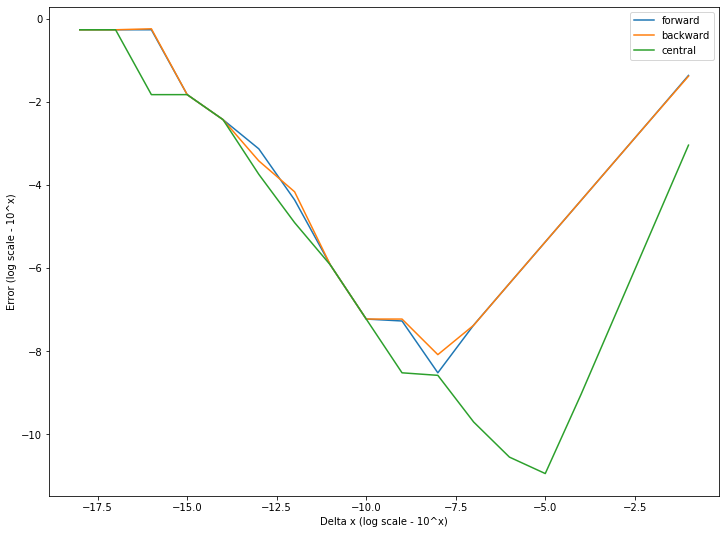

In [24]:
import numpy as np

def forward_difference(f, x, delx):
    return (f(x+delx) - f(x)) / delx

def backward_difference(f, x, delx):
    return (f(x) - f(x-delx)) / delx

def central_difference(f, x, delx):
    return (f(x+delx) - f(x-delx)) / (2*delx)

# create an array of step sizes to test
delx = 1/(10**np.arange(1,19)).astype(np.float64)

# define the function and analytical (exact) derivative
def f(x): return np.sin(x)
def df(x): return np.cos(x)
x = 1.

# forward difference error
forward_error = np.abs(forward_difference(f,x,delx) - df(x))
# backward difference error
backward_error = np.abs(backward_difference(f,x,delx) - df(x))
# forward difference error
central_error = np.abs(central_difference(f,x,delx) - df(x))

import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.plot(np.log10(delx), np.log10(forward_error), label="forward")
plt.plot(np.log10(delx), np.log10(backward_error), label="backward")
plt.plot(np.log10(delx), np.log10(central_error), label="central")
plt.xlabel("Delta x (log scale - 10^x)")
plt.ylabel("Error (log scale - 10^x)")
plt.legend()
plt.show()

Notice we plotted on the log10 scale for each axis. We can interpret this plot by scanning from right to left. As $\Delta x$ is decreased our overall error decreases because of truncation error. However, at a certain point Round-off Error bgeins to play a significant role and starts driving the total error back up. The optimal $\Delta x$ to use is certainly not the smallest - it is the balance between TE and RO. For first order accurate finite differences such as the forward and backward, that seems ot be around $\Delta x  = 10^{-8}$ and for second order accurate finite differences such as the central difference, this optimal $\Delta x$ is $10^{-5}$.